In [71]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import math
from IPython.display import display
import warnings
#warnings.filterwarnings('ignore')

def get_split(df,n):
    num_of_cols = df.iloc[:,0].size
    n_floor = math.floor(num_of_cols/n)
    remainder = num_of_cols%n
    temp1 = [n_floor]*(n-remainder)
    temp2 = [n_floor+1]*(remainder)
    list_of_num_partition = temp1+temp2
    #print(list_of_num_partition)
    other_df = df.copy()
    part_df_list = []
    for p_rows in list_of_num_partition:
        temp = other_df.head(p_rows)
        other_df = other_df.iloc[p_rows:]
        part_df_list.append(temp)
        
    result_df = part_df_list[0]
    for i in range(1,len(part_df_list)):
        result_df.reset_index(drop=True, inplace=True)
        temp = part_df_list[i]
        temp.reset_index(drop=True, inplace=True)
        result_df = pd.concat([result_df, temp], axis=1)
    #print(result_df)
    return result_df
#num_of_rows = df.iloc[:,0].size
#num_of_cols = df.iloc[0,:].size

pd.set_option('display.max_rows', None)

<h5>part (b)<h5>

In [72]:
# bending1
raw_bending1_list = []
for i in range(1,8):
    df = pd.read_csv('../data/AReM/bending1/dataset'+str(i)+'.csv',
                    skiprows = [0,1,2,3],
                    index_col=None)
    df.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    raw_bending1_list.append(df)
raw_bending1_list[0]


# bending2
raw_bending2_list = []
for i in range(1,7):
    df = pd.read_csv('../data/AReM/bending2/dataset'+str(i)+'.csv',
                    skiprows = [0,1,2,3],
                    index_col=None)
    df.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    raw_bending2_list.append(df)
raw_bending2_list[1]


# cycling
raw_cycling_list = []
for i in range(1,16):
    df = pd.read_csv('../data/AReM/cycling/dataset'+str(i)+'.csv',
                    skiprows = [0,1,2,3],
                    index_col=None)
    df.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    raw_cycling_list.append(df)
raw_cycling_list[0]


# lying
raw_lying_list = []
for i in range(1,16):
    df = pd.read_csv('../data/AReM/lying/dataset'+str(i)+'.csv',
                    skiprows = [0,1,2,3],
                    index_col=None)
    df.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    raw_lying_list.append(df)
raw_lying_list[0]


# sitting
raw_sitting_list = []
for i in range(1,16):
    df = pd.read_csv('../data/AReM/sitting/dataset'+str(i)+'.csv',
                    skiprows = [0,1,2,3],
                    index_col=None)
    df.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    raw_sitting_list.append(df)
raw_sitting_list[1]


# standing
raw_standing_list = []
for i in range(1,16):
    df = pd.read_csv('../data/AReM/standing/dataset'+str(i)+'.csv',
                    skiprows = [0,1,2,3],
                    index_col=None)
    df.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    raw_standing_list.append(df)
raw_standing_list[1]


# walking
raw_walking_list = []
for i in range(1,16):
    df = pd.read_csv('../data/AReM/walking/dataset'+str(i)+'.csv',
                    skiprows = [0,1,2,3],
                    index_col=None)
    df.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    raw_walking_list.append(df)
raw_walking_list[1]


#num_of_rows = df.iloc[:,0].size
#num_of_cols = df.iloc[0,:].size

# -------------------split train and test------------------------
raw_bending1_list_test = raw_bending1_list[0:2]
raw_bending1_list_train = raw_bending1_list[2:]
raw_bending2_list_test = raw_bending2_list[0:2]
raw_bending2_list_train = raw_bending2_list[2:]
raw_cycling_list_test = raw_cycling_list[0:3]
raw_cycling_list_train = raw_cycling_list[3:]
raw_lying_list_test = raw_lying_list[0:3]
raw_lying_list_train = raw_lying_list[3:]
raw_sitting_list_test = raw_sitting_list[0:3]
raw_sitting_list_train = raw_sitting_list[3:]
raw_standing_list_test = raw_standing_list[0:3]
raw_standing_list_train = raw_standing_list[3:]
raw_walking_list_test = raw_walking_list[0:3]
raw_walking_list_train = raw_walking_list[3:]

<h5>part (c) i)<h5>

In [ ]:
print('I choose max, mean and std.')

<h5>part (c) ii)<h5>

In [73]:
all_raw_list = raw_bending1_list+raw_bending2_list+raw_cycling_list+raw_lying_list+raw_sitting_list+raw_standing_list+raw_standing_list
# -----------------raw data------------------------
#print(len(all_raw_list))
result_table_data = []
for each_df in all_raw_list:
    describe_result = each_df.describe()
    describe_result = describe_result.reindex(['count','min','max','mean','50%','std','25%','75%'])
    temp_list = []
    for col in range(1,7):
        for row in range(1,8):
            temp1 = describe_result.iloc[row,col]
            temp_list.append(temp1)
    result_table_data.append(temp_list)        

    
# create header of result table
header = []
item_list = ['min','max','mean','median','std','1st quart','3rd quart']
for i in range(1,7):
    for j in range(0,7):
        temp = item_list[j]+str(i)
        header.append(temp)
    

df_result = pd.DataFrame(data=result_table_data, columns=header)
df_result.insert(0, "Instance", range(1,89))
display(df_result)


Instance   min1   max1      mean1  median1      std1  1st quart1  \
0          1  37.25  45.00  40.624792   40.500  1.476967     39.2500   
1          2  38.00  45.67  42.812812   42.500  1.435550     42.0000   
2          3  35.00  47.40  43.954500   44.330  1.558835     43.0000   
3          4  33.00  47.75  42.179813   43.500  3.670666     39.1500   
4          5  33.00  45.75  41.678063   41.750  2.243490     41.3300   
5          6  37.00  48.00  43.454958   43.250  1.386098     42.5000   
6          7  36.25  48.00  43.969125   44.500  1.618364     43.3100   
7          8  12.75  51.00  24.562958   24.250  3.737514     23.1875   
8          9   0.00  42.75  27.464604   28.000  3.583582     25.5000   
9         10  21.00  50.00  32.586208   33.000  6.238143     26.1875   
10        11  27.50  33.00  29.881938   30.000  1.153837     29.0000   
11        12  19.00  45.50  30.938104   29.000  7.684146     26.7500   
12        13  25.00  47.50  31.058250   29.710  4.829794     27.5000   
13        14  24.25  45.00  37.177042   36.250  3.581301     34.5000   
14        15  28.75  44.75  37.561188   36.875  3.226507     35.2500   
15        16  22.00  44.67  37.058708   36.000  3.710180     34.5000   
16        17  19.00  44.00  36.228396   36.000  3.528617     34.0000   
17        18  26.50  44.33  36.687292   36.000  3.529404     34.2500   
18        19  25.33  45.00  37.114312   36.250  3.710385     34.5000   
19        20  26.75  44.75  36.863375   36.330  3.555787     34.5000   
20        21  26.25  44.25  36.957458   36.290  3.434863     34.5000   
21        22  27.75  44.67  37.144833   36.330  3.758904     34.0000   
22        23  27.00  45.00  36.819521   36.000  3.900459     33.7500   
23        24  27.00  44.33  36.541667   36.000  4.018922     33.2500   
24        25  18.50  44.25  35.752354   36.000  4.614802     33.0000   
25        26  19.00  43.75  35.879875   36.000  4.614878     33.0000   
26        27  23.33  43.50  36.244083   36.750  3.822016     33.4575   
27        28  24.25  45.00  37.177042   36.250  3.581301     34.5000   
28        29  23.50  30.00  27.716375   27.500  1.442253     27.0000   
29        30  24.75  48.33  44.182937   48.000  7.495615     48.0000   
30        31  48.00  48.25  48.004167   48.000  0.032038     48.0000   
31        32  34.00  51.00  42.706063   40.500  3.537476     40.2500   
32        33  39.00  41.00  39.667833   39.500  0.280158     39.5000   
33        34   0.00  40.67  39.506187   39.500  1.817498     39.5000   
34        35  39.00  40.00  39.433792   39.500  0.208558     39.3300   
35        36  39.00  40.00  39.347104   39.330  0.231405     39.2500   
36        37  39.00  56.25  47.325125   42.670  5.961280     42.0000   
37        38  23.50  30.00  27.716375   27.500  1.442253     27.0000   
38        39  48.00  48.25  48.004167   48.000  0.032038     48.0000   
39        40  39.00  41.00  39.667833   39.500  0.280158     39.5000   
40        41  39.00  40.00  39.433792   39.500  0.208558     39.3300   
41        42  39.00  56.25  47.325125   42.670  5.961280     42.0000   
42        43  23.50  30.00  27.716375   27.500  1.442253     27.0000   
43        44  33.25  48.00  42.363563   43.000  2.068247     42.0000   
44        45  37.00  50.75  45.917667   45.635  1.089027     45.0000   
45        46  44.50  46.75  45.239667   45.000  0.429915     45.0000   
46        47  42.50  46.00  44.753958   45.000  0.520309     44.7500   
47        48  25.50  45.75  36.560063   36.500  5.915081     30.0000   
48        49  27.00  38.67  32.905979   30.250  3.505776     30.0000   
49        50  27.50  50.75  38.888375   36.750  3.642901     36.2500   
50        51  42.00  45.00  42.821983   42.500  0.891818     42.0000   
51        52  41.75  46.50  43.190854   42.500  1.230345     42.0000   
52        53  35.25  48.50  40.219271   39.250  2.741217     37.7500   
53        54  28.50  48.25  43.884833   45.250  3.198894     42.0000   
54        55  39.50  45.00  42.111583   42.0

<h5>part (c) iii)<h5>

In [74]:
min_df = df_result[['min1','min2','min3','min4','min5','min6']]
max_df = df_result[['max1','max2','max3','max4','max5','max6']]
mean_df = df_result[['mean1','mean2','mean3','mean4','mean5','mean6']]
median_df = df_result[['median1','median2','median3','median4','median5','median6']]
std_df = df_result[['std1','std2','std3','std4','std5','std6']]
firstq_df = df_result[['1st quart1','1st quart2','1st quart3','1st quart4','1st quart5','1st quart6']]
thirdq_df = df_result[['3rd quart1','3rd quart2','3rd quart3','3rd quart4','3rd quart5','3rd quart6']]

# calculate bootstrap
iterates = 100
df_list = [min_df,max_df,mean_df,median_df,std_df,firstq_df,thirdq_df]
df_name = ['min','max','mean','median','std','1st quart','3rd quart']

for k in range(0,7):
    print('\n\nFor feature '+df_name[k]+':\n')
    
    current_df = df_list[k]
    
    result_std_df = current_df.std(skipna = True,ddof=0) 
    result_std_df = result_std_df.to_frame()
    result_std_df.columns = ["estimate std"]

    
    result_interval_list = []
    for j in range(1,7):
        current_col_name = df_name[k]+str(j)
        current_col = current_df[current_col_name]
        std_interval = []
        for i in range(0,iterates):
            current_sample = np.random.choice(a=list(current_col), size=len(list(current_col)), replace=True)
            current_std = np.std(current_sample)
            std_interval.append(current_std)
        std_interval.sort()
        #result_interval = std_interval[5:95]
        result_interval_start = std_interval[5]
        result_interval_end = std_interval[94]
        result_interval = '['+str(result_interval_start)+','+str(result_interval_end)+']'
        result_interval_list.append(result_interval)

    result_std_df['90% Confidence Interval'] = result_interval_list
    print(result_std_df)




For feature min:

      estimate std                  90% Confidence Interval
min1      8.397086    [7.114568686181375,9.667239786536411]
min2      0.000000                                [0.0,0.0]
min3      2.739917  [2.5009158239888216,2.9518296412375205]
min4      0.000000                                [0.0,0.0]
min5      6.156647    [4.354220950140752,7.892238547281125]
min6      0.000000                                [0.0,0.0]


For feature max:

      estimate std                  90% Confidence Interval
max1      4.328527      [3.3453171908562,5.043021152547481]
max2      3.662153    [3.198893621690562,4.021093402143294]
max3      4.871872    [4.26322194026812,5.3293184568347485]
max4      1.955225    [1.723626054821493,2.160113059483708]
max5      5.846554    [4.790947891802082,6.660958875454484]
max6      2.231716  [1.9276581645829924,2.5431418369592684]


For feature mean:

       estimate std                  90% Confidence Interval
mean1      5.156060    [4.334847978696

<h5>part (c) iv)<h5>

In [ ]:
print('I choose max, mean and std.')

<h5>part (d) i)<h5>

max1      std1      mean1   max2      std2     mean2   max6      std6  \
0   47.40  1.558835  43.954500   1.70  0.338690  0.426250   1.79  0.513506   
1   47.75  3.670666  42.179813   3.00  0.630860  0.696042   2.18  0.524317   
2   45.75  2.243490  41.678063   2.83  0.405469  0.535979   1.79  0.389164   
3   48.00  1.386098  43.454958   1.58  0.315566  0.378083   5.26  0.622534   
4   48.00  1.618364  43.969125   1.50  0.263111  0.413125   2.96  0.487826   
5   50.00  6.238143  32.586208   9.90  0.789957  0.516125  13.61  1.332980   
6   33.00  1.153837  29.881938   1.00  0.275833  0.256438   6.40  0.481103   
7   45.50  7.684146  30.938104   6.40  0.734444  0.467167   6.73  1.080842   
8   47.50  4.829794  31.058250   6.38  0.566668  0.405458   4.92  0.831480   
9   44.00  3.528617  36.228396  12.28  1.886689  2.831687   9.98  1.827769   
10  44.33  3.529404  36.687292  12.89  2.073903  2.973042   8.19  1.629675   
11  45.00  3.710385  37.114312  10.84  1.924366  2.730000   9.50  1.824534   
12  44.75  3.555787  36.863375  11.68  2.115958  2.757312   8.81  1.569919   
13  44.25  3.434863  36.957458   8.64  1.724901  2.420083   8.34  1.631380   
14  44.67  3.758904  37.144833  10.76  1.643175  2.419062   8.75  1.637183   
15  45.00  3.900459  36.819521  10.47  1.821404  2.600146   8.99  1.723094   
16  44.33  4.018922  36.541667  10.43  1.892397  2.847958   9.18  1.769758   
17  44.25  4.614802  35.752354  12.60  2.140576  3.328104   9.39  1.748326   
18  43.75  4.614878  35.879875  11.20  2.237955  3.414312   8.50  1.626034   
19  43.50  3.822016  36.244083   9.71  2.092002  2.736021  11.15  1.963685   
20  45.00  3.581301  37.177042   8.58  1.601799  2.374208   9.34  1.852600   
21  51.00  3.537476  42.706063   4.85  0.484086  0.519813   4.97  0.648403   
22  41.00  0.280158  39.667833   1.00  0.194585  0.583604   3.49  0.608399   
23  40.67  1.817498  39.506187   1.00  0.145546  0.496479   3.19  0.498889   
24  40.00  0.208558  39.433792   1.00  0.160379  0.422104   4.06  0.438442   
25  40.00  0.231405  39.347104   0.50  0.195815  0.366396   3.50  0.423435   
26  56.25  5.961280  47.325125   8.49  0.562729  0.274313   5.72  0.723953   
27  30.00  1.442253  27.716375   1.79  0.394817  0.363688   4.50  0.612834   
28  48.25  0.032038  48.004167   0.43  0.055106  0.007167   2.50  0.388372   
29  41.00  0.280158  39.667833   1.00  0.194585  0.583604   3.49  0.608399   
30  40.00  0.208558  39.433792   1.00  0.160379  0.422104   4.06  0.438442   
31  56.25  5.961280  47.325125   8.49  0.562729  0.274313   5.72  0.723953   
32  30.00  1.442253  27.716375   1.79  0.394817  0.363688   4.50  0.613688   
33  46.00  0.520309  44.753958   1.12  0.258815  0.153917   4.30  0.652091   
34  45.75  5.915081  36.560063  12.19  0.772992  0.422167   6.26  0.717603   
35  38.67  3.505776  32.905979   2.49  0.538783  0.456750   5.12  0.755739   
36  50.75  3.642901  38.888375   6.06  0.488937  0.383438   5.17  0.750636   
37  45.00  0.891818  42.821983   1.12  0.260357  0.335678   6.36  0.764801   
38  46.50  1.230345  43.190854   1.50  0.271588  0.266271   5.45  0.645476   
39  48.50  2.741217  40.219271   3.28  0.485417  0.617479   6.36  1.025925   
40  48.25  3.198894  43.884833   3.28  0.394064  0.517354   7.00  1.150883   
41  45.00  1.122245  42.111583   1.09  0.295805  0.341938   6.36  0.882784   
42  44.75  1.356149  42.282667   1.00  0.147984  0.498354   7.85  0.794213   
43  44.67  1.017372  42.360187   1.00  0.246389  0.482500   4.64  0.608546   
44  46.00  2.046362  42.728854   4.72  0.382544  0.555333   5.10  0.851175   
45  46.67  2.395338  42.648521   2.95  0.413719  0.402833   4.64  0.709638   
46  47.50  2.384105  43.720021   1.92  0.374117  0.366708   6.18  0.916657   
47  47.75  1.772553  44.471146   2.18  0.392914  0.290479   4.32  0.756436   
48  48.00  1.748315  46.224937   4.50  0.464541  0.312354   6.00  0.668423   
49  48.00  1.832665  46.932208   4.60  0.367267  0.429667   6.58  0.855329   
50  47.67  1.328121  45.399

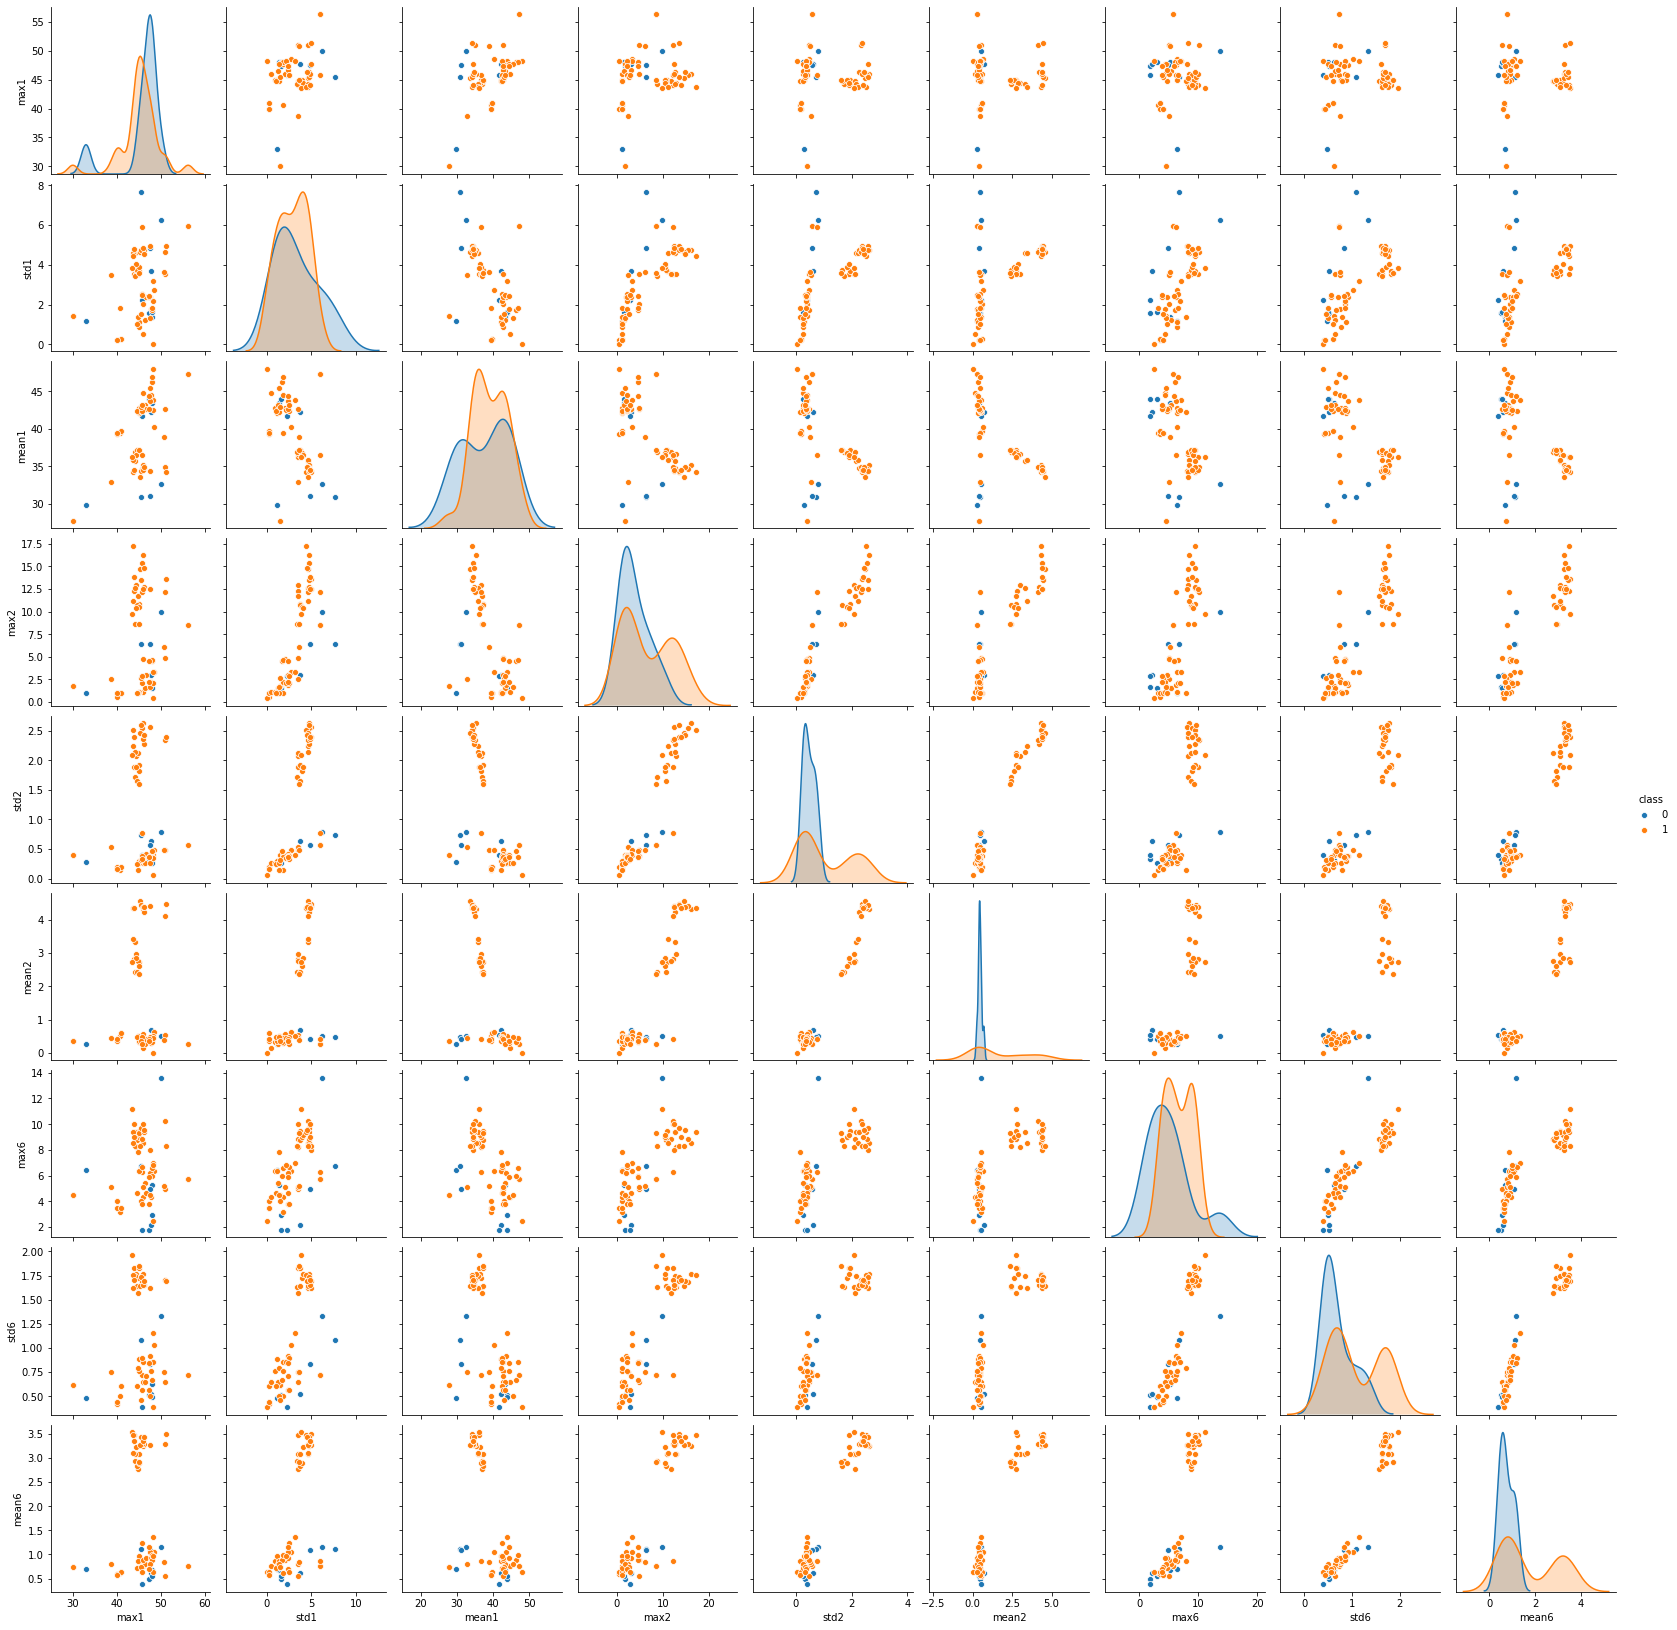

In [75]:
train_raw_list = raw_bending1_list_train+raw_bending2_list_train+raw_cycling_list_train+raw_lying_list_train+raw_sitting_list_train+raw_standing_list_train+raw_walking_list_train


# -----------------raw data------------------------
#print(len(train_raw_list))
result_table_data = []
for each_df in train_raw_list:
    describe_result = each_df.describe()
    describe_result = describe_result.reindex(['count','min','max','mean','50%','std','25%','75%'])
    temp_list = []
    for col in range(1,7):
        for row in range(1,8):
            temp1 = describe_result.iloc[row,col]
            temp_list.append(temp1)
    result_table_data.append(temp_list)        

    
# create header of result table
header = []
item_list = ['min','max','mean','median','std','1st quart','3rd quart']
for i in range(1,7):
    for j in range(0,7):
        temp = item_list[j]+str(i)
        header.append(temp)
    

df_result = pd.DataFrame(data=result_table_data, columns=header)
#df_result.insert(0, "Instance", range(1,70))
#display(df_result)
df_result_show = df_result[['max1','std1','mean1','max2','std2','mean2','max6','std6','mean6']] # missing min
#df_result_show = df_result[['min1','mean1','max1','min2','mean2','max2','min6','mean6','max6']] # missing std
#df_result_show = df_result[['min1','mean1','std1','min2','mean2','std2','min6','mean6','std6']] # missing max
#df_result_show = df_result[['min1','std1','max1','min2','std2','max2','min6','std6','max6']] # missing mean
temp = df_result_show.copy()
df_result_show = temp
df_result_show['class']=1
for i in range(0,9):
    df_result_show.iloc[i, 9] = 0
display(df_result_show)
seaborn.pairplot(df_result_show,hue='class') 
plt.show() 


<h5>part (d) ii)<h5>

Since the description of this question is not very clear to me, I put three possible scatter plots:
1. Scatter plot of features extracted from time series 1,2,6
2. Scatter plot of features extracted from time series 7,8,12
3. Scatter plot of features extracted from time series 1,2,12


1. Scatter plot of features extracted from time series 1,2,6


max1      std1      mean1   max2      std2     mean2   max6      std6  \
0   46.50  1.556971  44.057167   1.50  0.329540  0.381042   1.79  0.526656   
1   47.75  3.473355  43.278875   3.00  0.634285  0.673292   1.53  0.554542   
2   45.75  3.118644  41.621208   2.83  0.489595  0.623083   1.79  0.411200   
3   48.00  1.359836  44.117042   1.30  0.314099  0.250042   5.26  0.718016   
4   45.00  1.281976  43.486208   1.30  0.284434  0.378667   2.28  0.486847   
5   50.00  8.743464  32.014375   9.90  0.936124  0.587875  13.61  1.639122   
6   33.00  0.937965  30.712417   1.00  0.299197  0.298958   6.40  0.599116   
7   39.25  6.216895  29.189875   4.33  0.731004  0.497042   6.73  1.161161   
8   47.50  5.097232  34.110625   6.38  0.712906  0.528500   4.71  0.813779   
9   44.00  3.324873  36.183208   9.65  1.624349  2.753583   9.98  1.797080   
10  43.33  3.305618  36.517542  10.85  1.943909  2.874625   7.89  1.591958   
11  44.67  3.822253  37.069917  10.50  1.896667  2.792250   8.32  1.719806   
12  44.50  3.663132  36.830792  11.68  2.213281  2.838500   8.81  1.686158   
13  43.40  3.462793  36.865417   7.46  1.625296  2.387250   8.26  1.655499   
14  44.00  3.804785  37.144583  10.76  1.668517  2.385708   8.75  1.681203   
15  44.00  3.674276  36.776167  10.47  1.861745  2.743208   8.38  1.577452   
16  44.33  4.054482  36.644958   9.12  1.925332  2.826458   8.93  1.657335   
17  44.25  4.643595  35.692167  11.39  2.162230  3.324208   9.39  1.781492   
18  43.75  4.778355  35.694167  11.20  2.349525  3.658042   8.50  1.676682   
19  42.67  3.648495  36.342750   9.71  2.017423  2.691917   9.57  1.952846   
20  45.00  3.772836  36.954208   8.18  1.523329  2.392667   9.07  1.813728   
21  51.00  3.571787  45.176458   4.85  0.577656  0.311458   4.97  0.741844   
22  41.00  0.319219  39.810375   1.00  0.219826  0.683833   3.11  0.621418   
23  40.67  0.188164  39.583583   0.94  0.124616  0.509250   2.12  0.432693   
24  40.00  0.138712  39.527250   1.00  0.096071  0.474250   1.87  0.321565   
25  40.00  0.243587  39.313125   0.50  0.212731  0.332000   3.50  0.443428   
26  56.25  3.278433  42.996417   4.33  0.405363  0.363583   5.72  0.902521   
27  29.75  1.295725  27.368417   1.79  0.421739  0.308042   4.50  0.616380   
28  48.25  0.016137  48.001042   0.43  0.027756  0.001792   2.50  0.437388   
29  41.00  0.319219  39.810375   1.00  0.219826  0.683833   3.11  0.621418   
30  40.00  0.138712  39.527250   1.00  0.096071  0.474250   1.87  0.321565   
31  56.25  3.278433  42.996417   4.33  0.405363  0.363583   5.72  0.902521   
32  29.75  1.295725  27.368417   1.79  0.421739  0.308042   4.50  0.617839   
33  46.00  0.463467  44.858000   0.83  0.224131  0.109333   3.39  0.547834   
34  45.75  5.609641  40.017042  12.19  0.995605  0.406333   6.26  0.801926   
35  37.50  1.347559  30.470458   1.79  0.287259  0.117750   5.12  0.815207   
36  37.33  1.015928  36.192792   1.50  0.405631  0.498000   4.52  0.563392   
37  45.00  0.839666  43.272134   1.00  0.225842  0.440586   6.36  0.926935   
38  46.50  0.867982  44.130333   1.50  0.204548  0.449958   5.45  0.736756   
39  48.50  1.684487  42.537708   2.95  0.440989  0.427500   5.89  0.958006   
40  47.33  2.205981  45.315000   2.95  0.328552  0.482292   7.00  1.206909   
41  44.67  0.760260  42.031833   1.00  0.266994  0.173542   6.36  1.017607   
42  42.00  0.343763  41.494917   1.00  0.170790  0.470625   7.85  0.961261   
43  42.00  0.339056  41.587625   1.00  0.234996  0.416083   3.34  0.542871   
44  46.00  1.958342  42.706375   4.72  0.491357  0.609708   5.10  0.912882   
45  44.50  2.072146  41.371000   2.55  0.385062  0.512625   4.44  0.675430   
46  46.75  1.935843  44.116292   1.79  0.347747  0.313333   6.18  0.758355   
47  46.33  1.914471  44.296292   2.12  0.405758  0.255917   4.32  0.736418   
48  47.00  1.309144  45.060000   4.50  0.491716  0.417250   3.00  0.503862   
49  48.00  0.556636  47.507167   2.59  0.242591  0.428833   6.58  0.914629   
50  47.67  0.560762  46.013

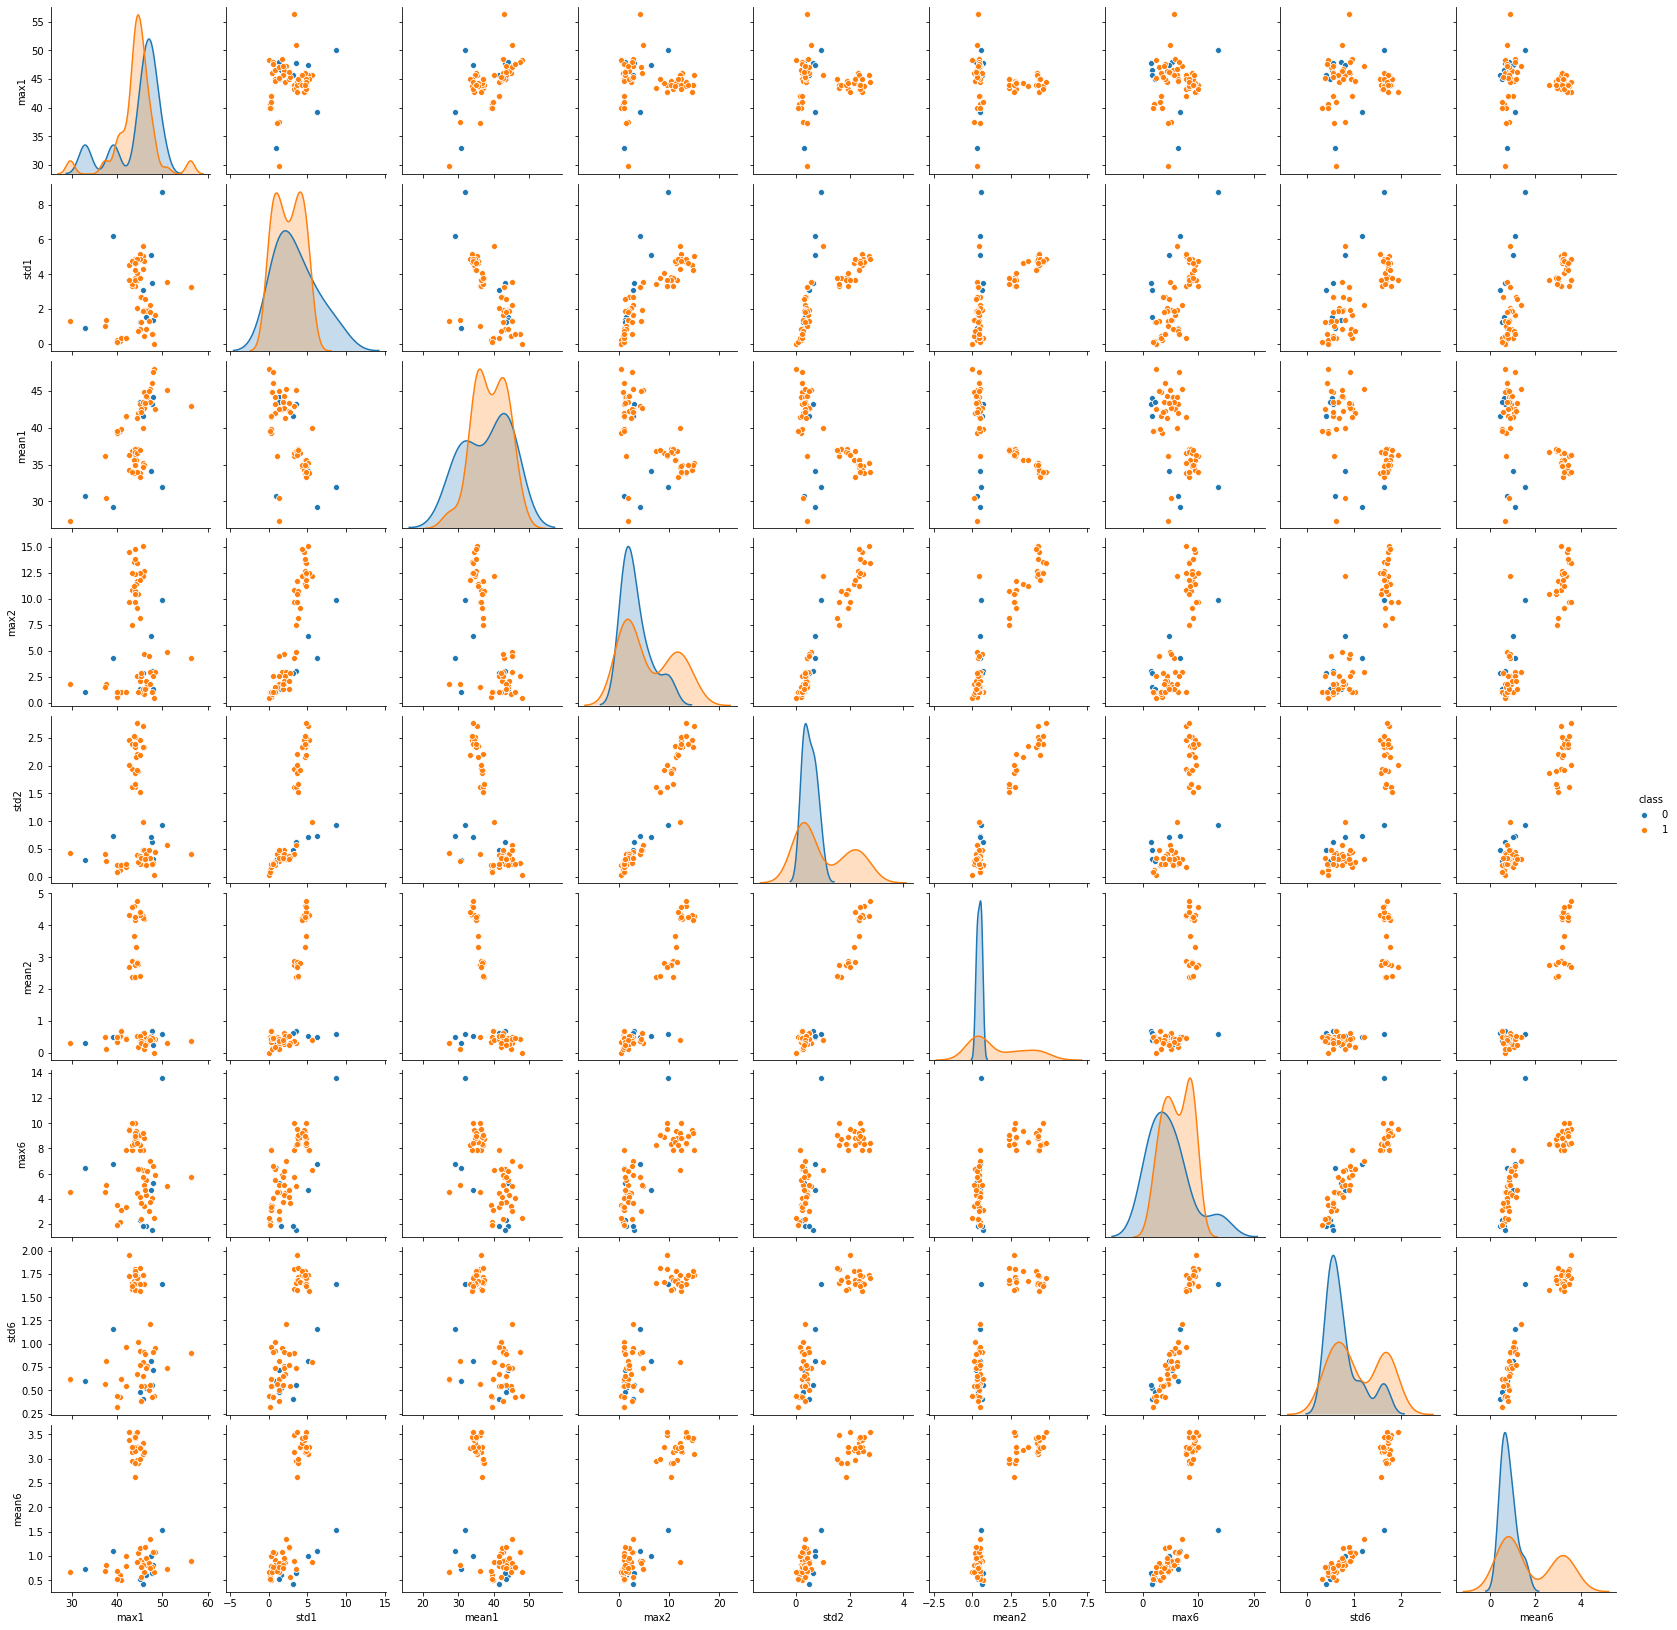

In [76]:
# -----------------raw data------------------------
#print(len(train_raw_list))
result_table_data = []
l = 2
for each_df in train_raw_list:
    # ---------------------changing...-----------------------------------
    temp = each_df.drop(columns=['time'])
    new_form_df = get_split(temp,l) 
    describe_result = new_form_df.describe()
    #print('\neach describe')
    #print(describe_result)
    describe_result = describe_result.reindex(['count','min','max','mean','50%','std','25%','75%'])
    temp_list = []
    for col in range(0,l*6):
        for row in range(1,8):
            temp1 = describe_result.iloc[row,col]
            temp_list.append(temp1)
    result_table_data.append(temp_list)        

    
# create header of result table
header = []
item_list = ['min','max','mean','median','std','1st quart','3rd quart']
for i in range(1,l*6+1):
    for j in range(0,7):
        temp = item_list[j]+str(i)
        header.append(temp)
    

df_result = pd.DataFrame(data=result_table_data, columns=header)
#df_result.insert(0, "Instance", range(1,70))
#display(df_result)
df_result_show = df_result[['max1','std1','mean1','max2','std2','mean2','max6','std6','mean6']] # missing min
#df_result_show = df_result[['min1','mean1','max1','min2','mean2','max2','min6','mean6','max6']] # missing std
#df_result_show = df_result[['min1','mean1','std1','min2','mean2','std2','min6','mean6','std6']] # missing max
#df_result_show = df_result[['min1','std1','max1','min2','std2','max2','min6','std6','max6']] # missing mean
temp = df_result_show.copy()
df_result_show = temp
df_result_show['class']=1
for i in range(0,9):
    df_result_show.iloc[i, 9] = 0
    
print('Since the description of this question is not very clear to me, I put three possible scatter plots:')
print('1. Scatter plot of features extracted from time series 1,2,6')
print('2. Scatter plot of features extracted from time series 7,8,12')
print('3. Scatter plot of features extracted from time series 1,2,12')

print('\n\n1. Scatter plot of features extracted from time series 1,2,6')
display(df_result_show)
seaborn.pairplot(df_result_show,hue='class') 
plt.show() 


2. Scatter plot of features extracted from time series 7,8,12


max7      std7      mean7   max8      std8     mean8  max12     std12  \
0   47.40  1.557168  43.851833   1.70  0.342346  0.471458   1.50  0.478528   
1   46.00  3.537481  41.080750   2.86  0.627915  0.718792   2.18  0.491873   
2   43.67  0.595920  41.734917   1.12  0.273050  0.448875   1.50  0.363144   
3   46.50  1.058792  42.792875   1.58  0.260761  0.506125   4.06  0.473445   
4   48.00  1.771251  44.452042   1.50  0.235493  0.447583   2.96  0.487918   
5   36.00  0.941701  33.158042   1.87  0.603331  0.444375   6.02  0.768408   
6   30.00  0.635067  29.051458   0.87  0.243590  0.213917   1.50  0.322210   
7   45.50  8.576204  32.686333   6.40  0.738184  0.437292   5.61  0.996452   
8   33.00  1.434469  28.005875   2.18  0.323927  0.282417   4.92  0.838177   
9   44.00  3.727665  36.273583  12.28  2.117387  2.909792   8.61  1.861694   
10  44.33  3.739054  36.857042  12.89  2.195884  3.071458   8.19  1.667305   
11  45.00  3.602490  37.158708  10.84  1.953646  2.667750   9.50  1.912478   
12  44.75  3.452460  36.895958  10.50  2.015300  2.676125   8.44  1.420814   
13  44.25  3.411449  37.049500   8.64  1.821885  2.452917   8.34  1.609793   
14  44.67  3.720410  37.145083   7.79  1.620234  2.452417   7.93  1.590096   
15  45.00  4.121498  36.862875   9.49  1.772485  2.457083   8.99  1.820408   
16  44.00  3.988835  36.438375  10.43  1.862655  2.869458   9.18  1.878752   
17  44.00  4.594741  35.812542  12.60  2.123213  3.332000   8.81  1.712062   
18  43.33  4.447624  36.065583  10.54  2.097206  3.170583   7.89  1.561593   
19  43.50  3.993202  36.145417   9.63  2.167337  2.780125  11.15  1.978396   
20  44.67  3.372104  37.399875   8.58  1.679596  2.355750   9.34  1.890755   
21  41.00  0.255719  40.235667   1.00  0.220877  0.728167   2.83  0.480282   
22  40.00  0.120823  39.525292   0.83  0.085940  0.483375   3.49  0.566910   
23  40.50  2.563784  39.428792   1.00  0.163092  0.483708   3.19  0.557579   
24  40.00  0.224481  39.340333   0.50  0.191989  0.369958   4.06  0.524006   
25  40.00  0.213699  39.381083   0.50  0.170928  0.400792   2.05  0.381263   
26  54.00  4.779337  51.653833   8.49  0.674039  0.185042   3.56  0.453367   
27  30.00  1.498942  28.064333   1.48  0.358233  0.419333   3.30  0.603417   
28  48.25  0.042156  48.007292   0.43  0.072509  0.012542   1.30  0.330623   
29  40.00  0.120823  39.525292   0.83  0.085940  0.483375   3.49  0.566910   
30  40.00  0.224481  39.340333   0.50  0.191989  0.369958   4.06  0.524006   
31  54.00  4.779337  51.653833   8.49  0.674039  0.185042   3.56  0.453367   
32  30.00  1.498942  28.064333   1.48  0.358233  0.419333   3.30  0.603417   
33  45.67  0.553203  44.649917   1.12  0.282886  0.198500   4.30  0.731612   
34  39.00  3.827961  33.103083   1.64  0.453654  0.438000   3.54  0.623278   
35  38.67  3.302011  35.341500   2.49  0.518139  0.795750   4.92  0.691814   
36  50.75  3.312360  41.583958   6.06  0.536865  0.268875   5.17  0.873443   
37  45.00  0.695818  42.373708   1.12  0.250629  0.231208   3.19  0.554788   
38  44.67  0.712609  42.251375   1.09  0.195510  0.082583   3.00  0.540109   
39  46.25  1.194656  37.900833   3.28  0.453086  0.807458   6.36  1.091122   
40  48.25  3.396238  42.454667   3.28  0.448116  0.552417   6.55  1.094368   
41  45.00  1.390456  42.191333   1.09  0.217094  0.510333   4.50  0.711063   
42  44.75  1.523650  43.070417   0.94  0.114791  0.526083   4.32  0.553706   
43  44.67  0.872216  43.132750   1.00  0.239971  0.548917   4.64  0.659703   
44  45.00  2.134618  42.751333   1.48  0.214293  0.500958   4.03  0.786558   
45  46.67  1.981850  43.926042   2.95  0.412989  0.293042   4.64  0.741586   
46  47.50  2.707181  43.323750   1.92  0.392253  0.420083   5.72  1.040579   
47  47.75  1.603257  44.646000   2.18  0.377320  0.325042   4.32  0.775612   
48  48.00  1.298702  47.389875   3.35  0.410629  0.207458   6.00  0.799981   
49  48.00  2.399503  46.357250   4.60  0.459872  0.430500   5.46  0.783585   
50  47.00  1.569452  44.785

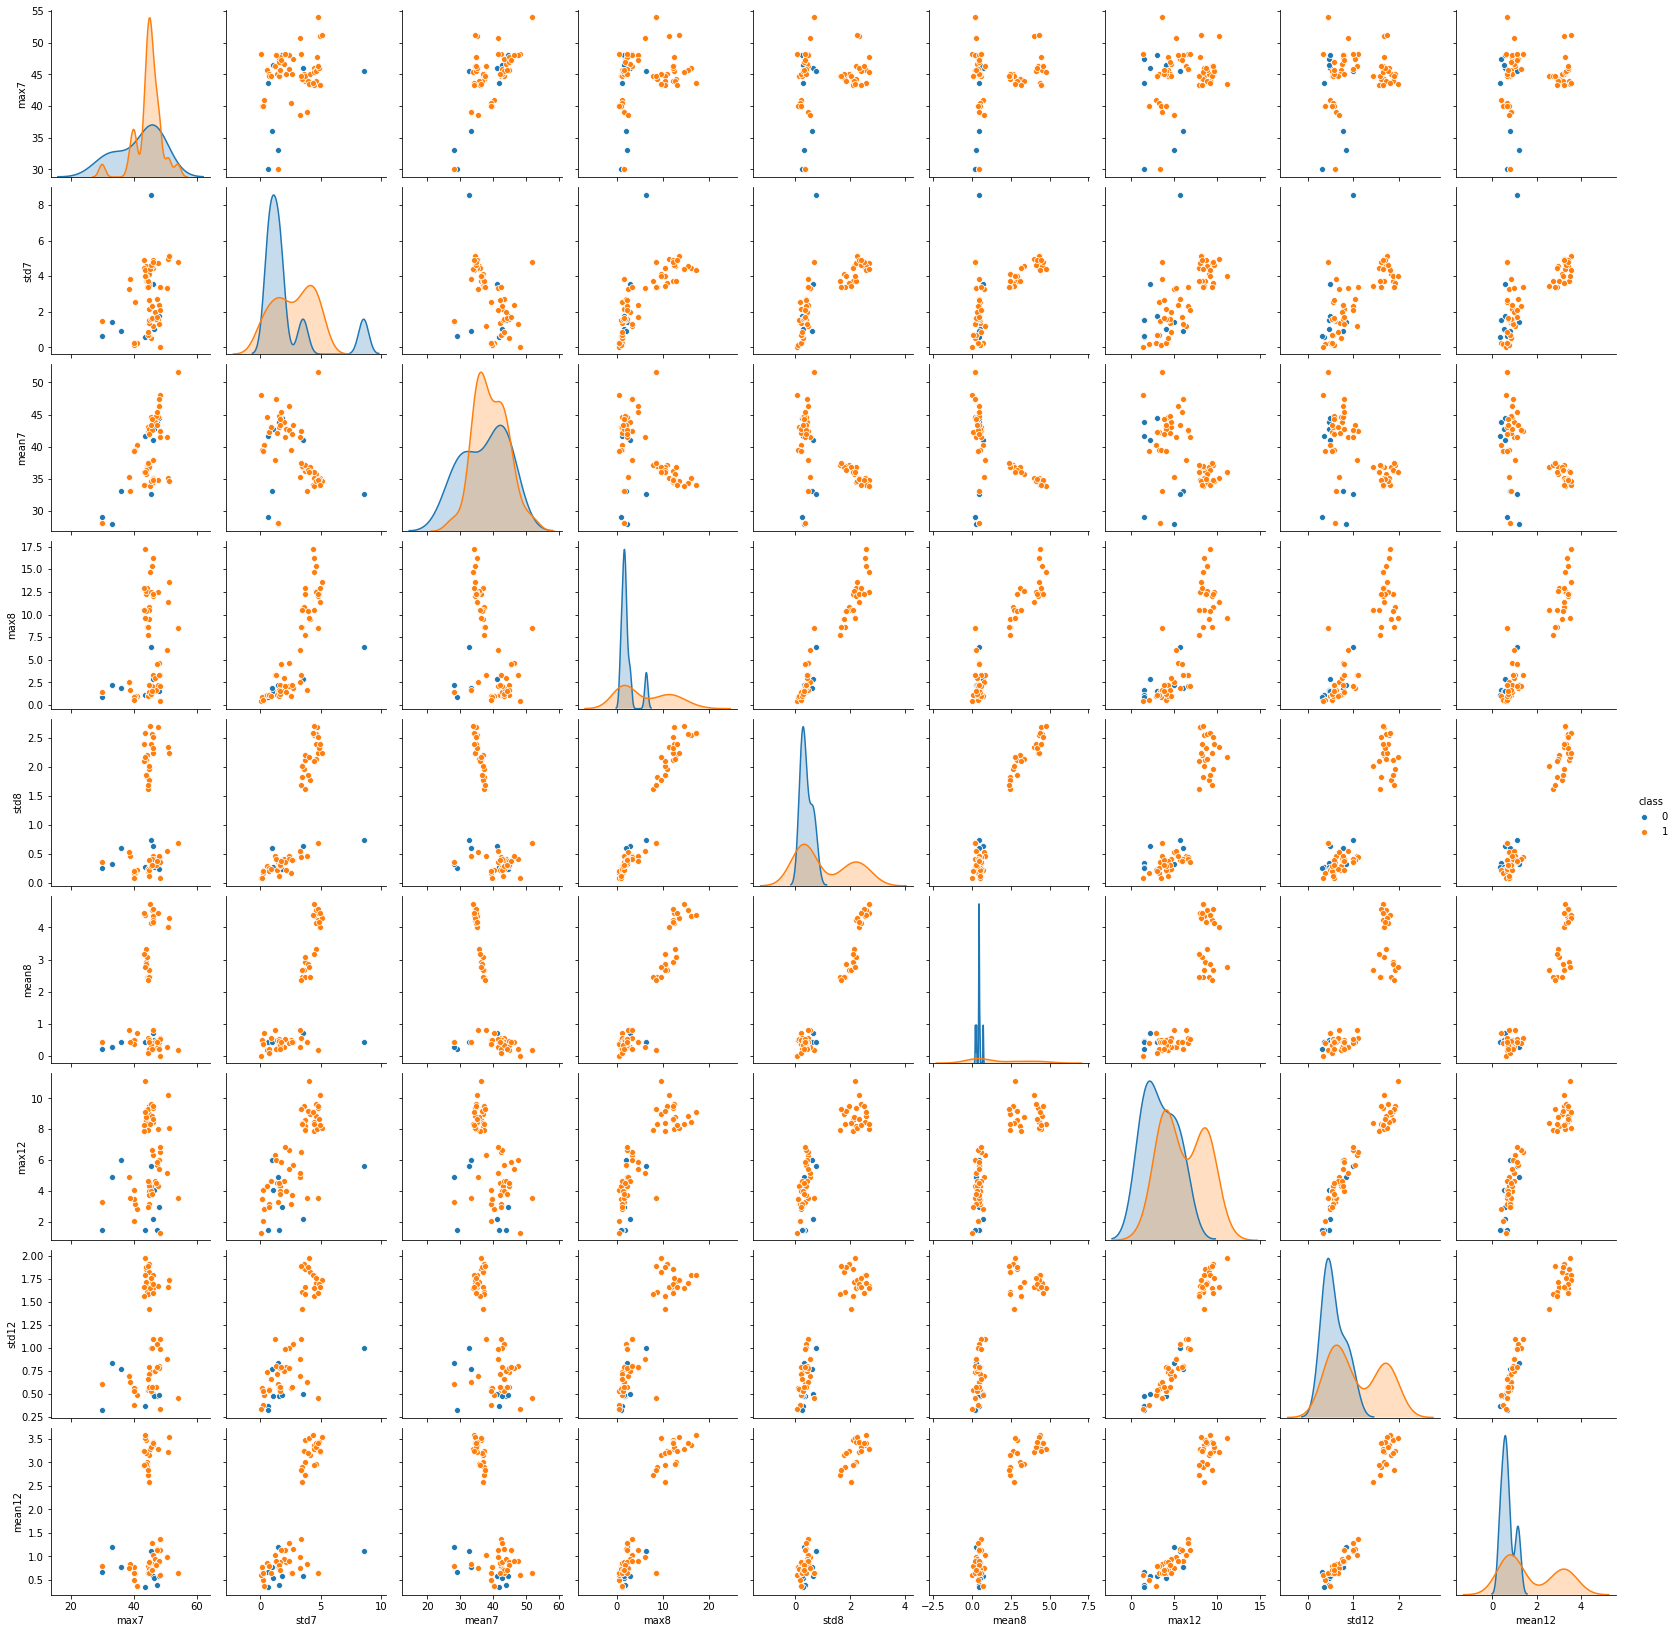

In [77]:
df_result_show = df_result[['max7','std7','mean7','max8','std8','mean8','max12','std12','mean12']] # missing min
#df_result_show = df_result[['min7','mean7','max7','min8','mean8','max8','min12','mean12','max12']] # missing std
#df_result_show = df_result[['min7','mean7','std7','min8','mean8','std8','min12','mean12','std12']] # missing max
#df_result_show = df_result[['min7','std7','max7','min8','std8','max8','min12','std12','max12']] # missing mean
temp = df_result_show.copy()
df_result_show = temp
df_result_show['class']=1
for i in range(0,9):
    df_result_show.iloc[i, 9] = 0
print('2. Scatter plot of features extracted from time series 7,8,12')
display(df_result_show)
seaborn.pairplot(df_result_show,hue='class') 
plt.show() 

3. Scatter plot of features extracted from time series 1,2,12


max1      std1      mean1   max2      std2     mean2  max12     std12  \
0   46.50  1.556971  44.057167   1.50  0.329540  0.381042   1.50  0.478528   
1   47.75  3.473355  43.278875   3.00  0.634285  0.673292   2.18  0.491873   
2   45.75  3.118644  41.621208   2.83  0.489595  0.623083   1.50  0.363144   
3   48.00  1.359836  44.117042   1.30  0.314099  0.250042   4.06  0.473445   
4   45.00  1.281976  43.486208   1.30  0.284434  0.378667   2.96  0.487918   
5   50.00  8.743464  32.014375   9.90  0.936124  0.587875   6.02  0.768408   
6   33.00  0.937965  30.712417   1.00  0.299197  0.298958   1.50  0.322210   
7   39.25  6.216895  29.189875   4.33  0.731004  0.497042   5.61  0.996452   
8   47.50  5.097232  34.110625   6.38  0.712906  0.528500   4.92  0.838177   
9   44.00  3.324873  36.183208   9.65  1.624349  2.753583   8.61  1.861694   
10  43.33  3.305618  36.517542  10.85  1.943909  2.874625   8.19  1.667305   
11  44.67  3.822253  37.069917  10.50  1.896667  2.792250   9.50  1.912478   
12  44.50  3.663132  36.830792  11.68  2.213281  2.838500   8.44  1.420814   
13  43.40  3.462793  36.865417   7.46  1.625296  2.387250   8.34  1.609793   
14  44.00  3.804785  37.144583  10.76  1.668517  2.385708   7.93  1.590096   
15  44.00  3.674276  36.776167  10.47  1.861745  2.743208   8.99  1.820408   
16  44.33  4.054482  36.644958   9.12  1.925332  2.826458   9.18  1.878752   
17  44.25  4.643595  35.692167  11.39  2.162230  3.324208   8.81  1.712062   
18  43.75  4.778355  35.694167  11.20  2.349525  3.658042   7.89  1.561593   
19  42.67  3.648495  36.342750   9.71  2.017423  2.691917  11.15  1.978396   
20  45.00  3.772836  36.954208   8.18  1.523329  2.392667   9.34  1.890755   
21  51.00  3.571787  45.176458   4.85  0.577656  0.311458   2.83  0.480282   
22  41.00  0.319219  39.810375   1.00  0.219826  0.683833   3.49  0.566910   
23  40.67  0.188164  39.583583   0.94  0.124616  0.509250   3.19  0.557579   
24  40.00  0.138712  39.527250   1.00  0.096071  0.474250   4.06  0.524006   
25  40.00  0.243587  39.313125   0.50  0.212731  0.332000   2.05  0.381263   
26  56.25  3.278433  42.996417   4.33  0.405363  0.363583   3.56  0.453367   
27  29.75  1.295725  27.368417   1.79  0.421739  0.308042   3.30  0.603417   
28  48.25  0.016137  48.001042   0.43  0.027756  0.001792   1.30  0.330623   
29  41.00  0.319219  39.810375   1.00  0.219826  0.683833   3.49  0.566910   
30  40.00  0.138712  39.527250   1.00  0.096071  0.474250   4.06  0.524006   
31  56.25  3.278433  42.996417   4.33  0.405363  0.363583   3.56  0.453367   
32  29.75  1.295725  27.368417   1.79  0.421739  0.308042   3.30  0.603417   
33  46.00  0.463467  44.858000   0.83  0.224131  0.109333   4.30  0.731612   
34  45.75  5.609641  40.017042  12.19  0.995605  0.406333   3.54  0.623278   
35  37.50  1.347559  30.470458   1.79  0.287259  0.117750   4.92  0.691814   
36  37.33  1.015928  36.192792   1.50  0.405631  0.498000   5.17  0.873443   
37  45.00  0.839666  43.272134   1.00  0.225842  0.440586   3.19  0.554788   
38  46.50  0.867982  44.130333   1.50  0.204548  0.449958   3.00  0.540109   
39  48.50  1.684487  42.537708   2.95  0.440989  0.427500   6.36  1.091122   
40  47.33  2.205981  45.315000   2.95  0.328552  0.482292   6.55  1.094368   
41  44.67  0.760260  42.031833   1.00  0.266994  0.173542   4.50  0.711063   
42  42.00  0.343763  41.494917   1.00  0.170790  0.470625   4.32  0.553706   
43  42.00  0.339056  41.587625   1.00  0.234996  0.416083   4.64  0.659703   
44  46.00  1.958342  42.706375   4.72  0.491357  0.609708   4.03  0.786558   
45  44.50  2.072146  41.371000   2.55  0.385062  0.512625   4.64  0.741586   
46  46.75  1.935843  44.116292   1.79  0.347747  0.313333   5.72  1.040579   
47  46.33  1.914471  44.296292   2.12  0.405758  0.255917   4.32  0.775612   
48  47.00  1.309144  45.060000   4.50  0.491716  0.417250   6.00  0.799981   
49  48.00  0.556636  47.507167   2.59  0.242591  0.428833   5.46  0.783585   
50  47.67  0.560762  46.013

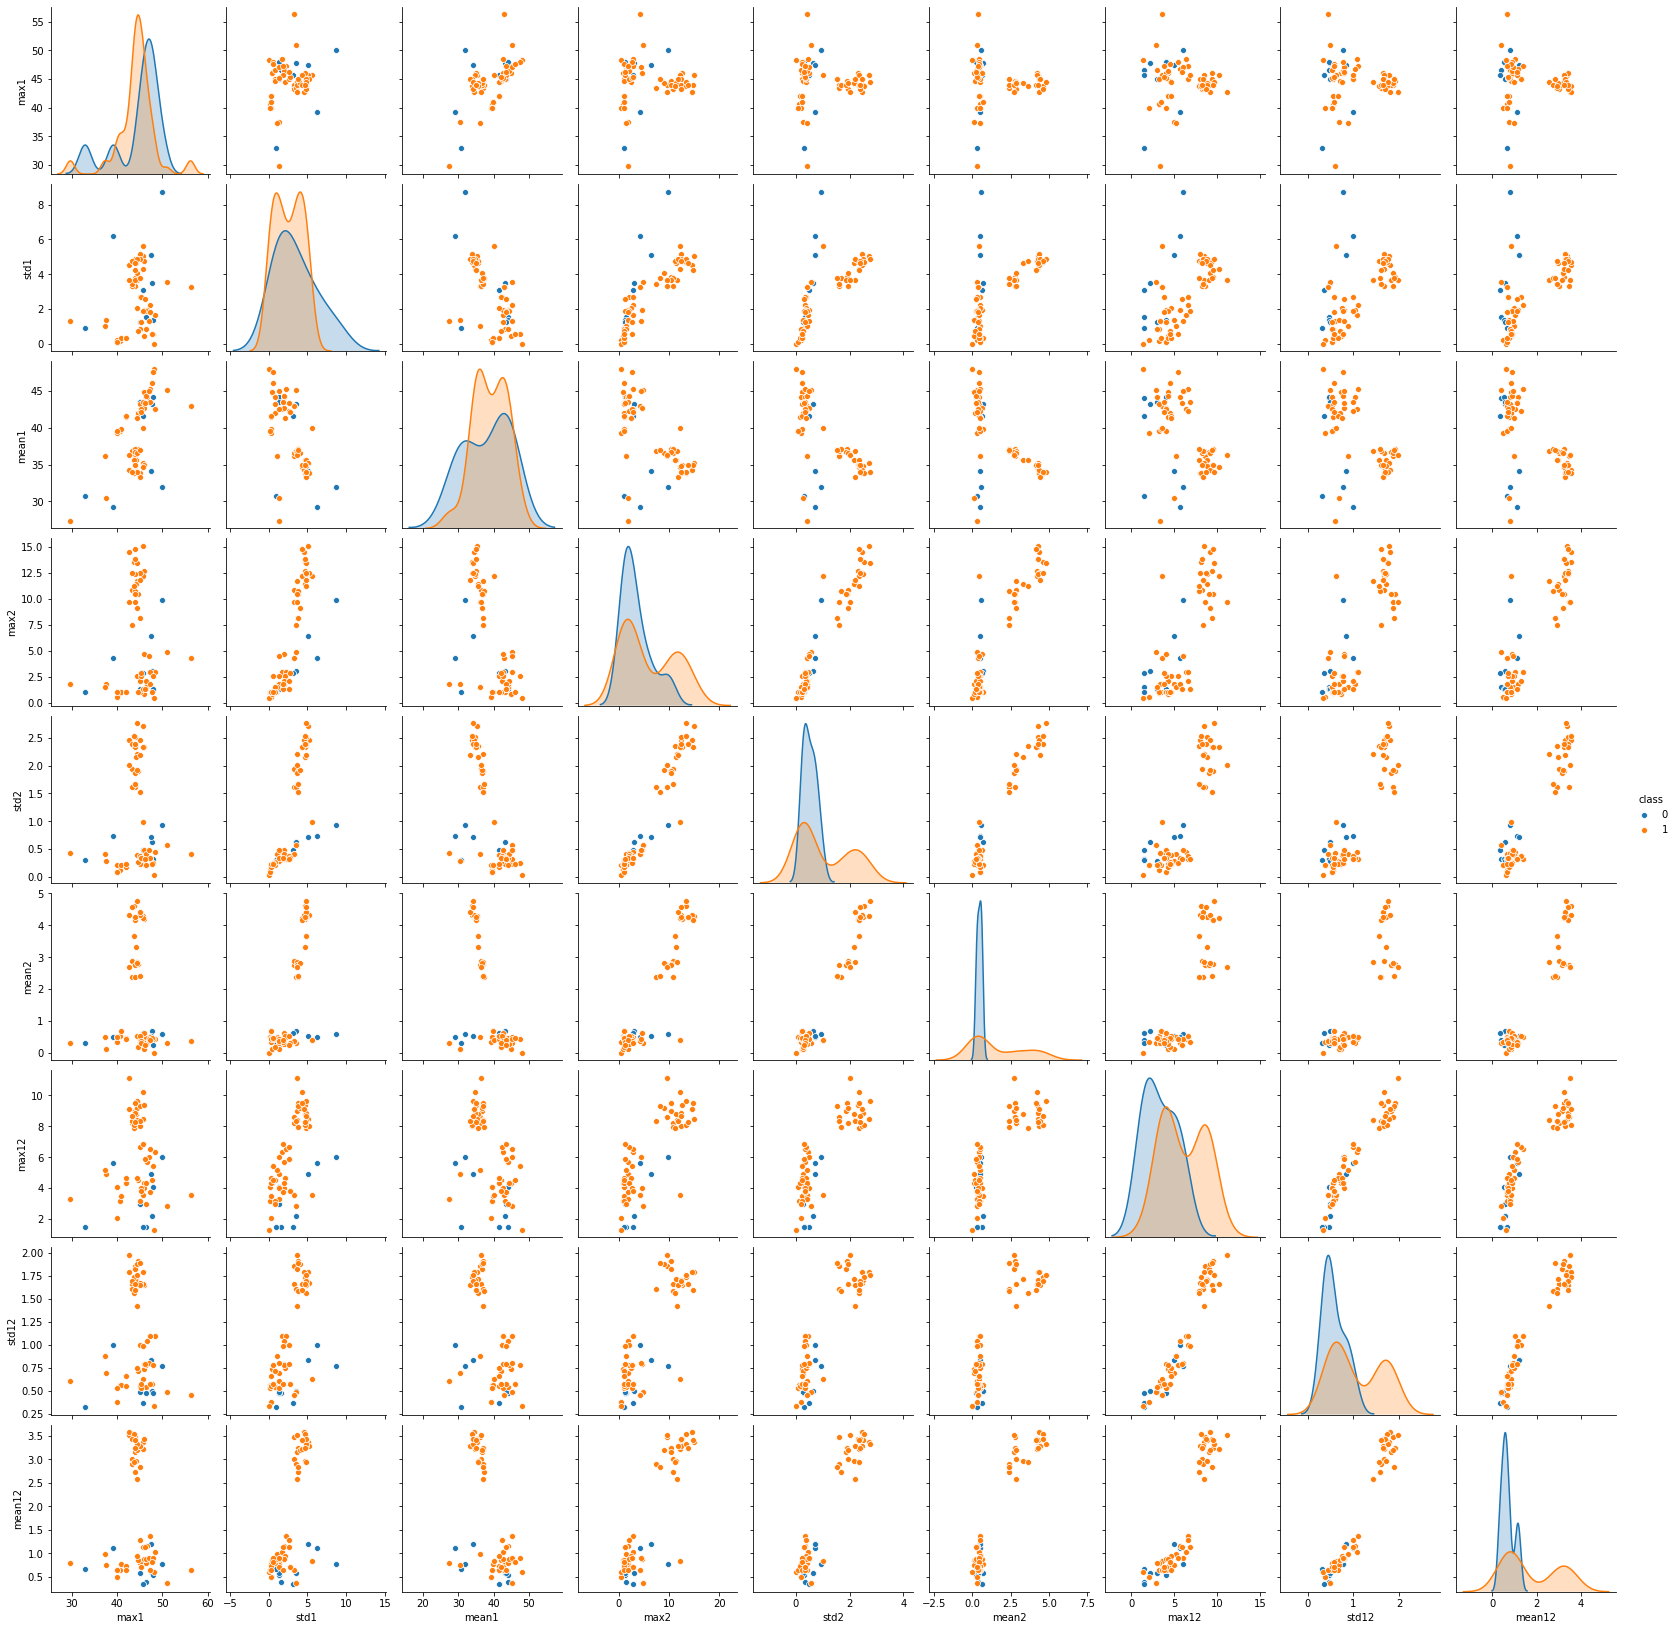

In [78]:
df_result_show = df_result[['max1','std1','mean1','max2','std2','mean2','max12','std12','mean12']] # missing min
#df_result_show = df_result[['min1','mean1','max1','min2','mean2','max2','min12','mean12','max12']] # missing std
#df_result_show = df_result[['min1','mean1','std1','min2','mean2','std2','min12','mean12','std12']] # missing max
#df_result_show = df_result[['min1','std1','max1','min2','std2','max2','min12','std12','max12']] # missing mean
temp = df_result_show.copy()
df_result_show = temp
df_result_show['class']=1
for i in range(0,9):
    df_result_show.iloc[i, 9] = 0
print('3. Scatter plot of features extracted from time series 1,2,12')
display(df_result_show)
seaborn.pairplot(df_result_show,hue='class') 
plt.show() 

<h5>part (d) iii)<h5>

In [108]:
import statsmodels.api as sm
# -----------------raw data------------------------
#print(len(train_raw_list))
result_table_data = []
l = 2

for each_df in train_raw_list:
    
    temp1 = each_df.drop(columns=['time'])
    temp=(temp1-temp1.min())/(temp1.max()-temp1.min())
    new_form_df = get_split(temp,l) 
    describe_result = new_form_df.describe()
    #print('\neach describe')
    #print(describe_result)
    describe_result = describe_result.reindex(['count','min','max','mean','50%','std','25%','75%'])
    temp_list = []
    for col in range(0,l*6):
        for row in range(1,8):
            temp1 = describe_result.iloc[row,col]
            temp_list.append(temp1)
    result_table_data.append(temp_list)        

    
# create header of result table
header = []
item_list = ['min','max','mean','median','std','1st quart','3rd quart']
for i in range(1,l*6+1):
    for j in range(0,7):
        temp = item_list[j]+str(i)
        header.append(temp)
    

df_result = pd.DataFrame(data=result_table_data, columns=header)
#display(df_result)
selected_header =[]
item_list = ['max','mean','std']
for i in range(1,l*6+1):
    for j in range(0,3):
        temp = item_list[j]+str(i)
        selected_header.append(temp)

df_result_show = df_result[selected_header]
temp = df_result_show.copy()
df_result_show = temp
df_result_show['class']=1
for i in range(0,9):
    df_result_show.iloc[i, l*18] = 0
display(df_result_show)



Xtrain = df_result_show[selected_header] 
ytrain = df_result_show[['class']] 
log_reg = sm.Logit(ytrain, Xtrain).fit(method='bfgs',maxiter=20)
print(log_reg.summary()) 

max1     mean1      std1  max2     mean2      std2  max3     mean3  \
0    1.0  0.722137  0.125713   1.0  0.250735  0.199230   1.0  0.671929   
1    1.0  0.622360  0.248859   1.0  0.232014  0.210287   1.0  0.636448   
2    1.0  0.680632  0.175960   1.0  0.189392  0.143275   1.0  0.633923   
3    1.0  0.586814  0.126009   1.0  0.239293  0.199726   1.0  0.472627   
4    1.0  0.656947  0.137733   1.0  0.275417  0.175407   1.0  0.578656   
5    1.0  0.399524  0.215108   1.0  0.052134  0.079794   1.0  0.493509   
6    1.0  0.433080  0.209789   1.0  0.256438  0.275833   1.0  0.563190   
7    1.0  0.450494  0.289968   1.0  0.072995  0.114757   1.0  0.445491   
8    1.0  0.269256  0.214658   1.0  0.063551  0.088819   1.0  0.505001   
9    1.0  0.689136  0.141145   1.0  0.230593  0.153639   1.0  0.502506   
10   1.0  0.571357  0.197948   1.0  0.230647  0.160892   1.0  0.505361   
11   1.0  0.599101  0.188632   1.0  0.251845  0.177525   1.0  0.563460   
12   1.0  0.561854  0.197544   1.0  0.236071  0.181161   1.0  0.474737   
13   1.0  0.594859  0.190826   1.0  0.280102  0.199641   1.0  0.426329   
14   1.0  0.555250  0.222157   1.0  0.224820  0.152711   1.0  0.605999   
15   1.0  0.545529  0.216692   1.0  0.248342  0.173964   1.0  0.498325   
16   1.0  0.550587  0.231906   1.0  0.273054  0.181438   1.0  0.468669   
17   1.0  0.669994  0.179216   1.0  0.264135  0.169887   1.0  0.502501   
18   1.0  0.682015  0.186460   1.0  0.304849  0.199817   1.0  0.479043   
19   1.0  0.640262  0.189490   1.0  0.281774  0.215448   1.0  0.531893   
20   1.0  0.622990  0.172593   1.0  0.276714  0.186690   1.0  0.519110   
21   1.0  0.512121  0.208087   1.0  0.107178  0.099812   1.0  0.474346   
22   1.0  0.333917  0.140079   1.0  0.583604  0.194585   1.0  0.722281   
23   1.0  0.971384  0.044689   1.0  0.496479  0.145546   1.0  0.494346   
24   1.0  0.433792  0.208558   1.0  0.422104  0.160379   1.0  0.478782   
25   1.0  0.347104  0.231405   1.0  0.732792  0.391629   1.0  0.386779   
26   1.0  0.482616  0.345581   1.0  0.032310  0.066281   1.0  0.522298   
27   1.0  0.648673  0.221885   1.0  0.203177  0.220568   1.0  0.458725   
28   1.0  0.016667  0.128153   1.0  0.016667  0.128153   1.0  0.376966   
29   1.0  0.333917  0.140079   1.0  0.583604  0.194585   1.0  0.722281   
30   1.0  0.433792  0.208558   1.0  0.422104  0.160379   1.0  0.478782   
31   1.0  0.482616  0.345581   1.0  0.032310  0.066281   1.0  0.522298   
32   1.0  0.648673  0.221885   1.0  0.203177  0.220568   1.0  0.458759   
33   1.0  0.643988  0.148660   1.0  0.137426  0.231085   1.0  0.632299   
34   1.0  0.546176  0.292103   1.0  0.034632  0.063412   1.0  0.604123   
35   1.0  0.506082  0.300409   1.0  0.183434  0.216379   1.0  0.649690   
36   1.0  0.489823  0.156684   1.0  0.063274  0.080683   1.0  0.613985   
37   1.0  0.273994  0.297273   1.0  0.299713  0.232461   1.0  0.747813   
38   1.0  0.303338  0.259020   1.0  0.177514  0.181059   1.0  0.685663   
39   1.0  0.375039  0.206884   1.0  0.188256  0.147993   1.0  0.631967   
40   1.0  0.778979  0.161969   1.0  0.157730  0.120142   1.0  0.618448   
41   1.0  0.474833  0.204044   1.0  0.313704  0.271380   1.0  0.524874   
42   1.0  0.514304  0.266958   1.0  0.498354  0.147984   1.0  0.416244   
43   1.0  0.505393  0.217853   1.0  0.482500  0.246389   1.0  0.506258   
44   1.0  0.804708  0.122171   1.0  0.117655  0.081047   1.0  0.659319   
45   1.0  0.758759  0.143692   1.0  0.136554  0.140244   1.0  0.829002   
46   1.0  0.671306  0.207313   1.0  0.190994  0.194852   1.0  0.721582   
47   1.0  0.752539  0.133778   1.0  0.133247  0.180236   1.0  0.792930   
48   1.0  0.857995  0.139865   1.0  0.069412  0.103231   1.0  0.715795   
49   1.0  0.941491  0.100420   1.0  0.093406  0.079841   1.0  0.713645   
50   1.0  0.799791  0.117118   1.0  0.277196  0.162583   1.0  0.818805   
51   1.0  0.655094  0.257156   1.0  0.217246  0.182738   1.0  0.565396   
52   1.0  0.490396  0.195178   1.0  0.207871  0.164826   1.0  0.588854   
53   1.0

         Current function value: 0.329350
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                   69
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                           12
Date:                Sat, 10 Oct 2020   Pseudo R-squ.:                  0.1494
Time:                        20:48:22   Log-Likelihood:                -22.725
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                    0.7863
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
max1          -0.5663        nan        nan        nan         nan         n

C:\Users\notya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\notya\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\notya\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<h5>ISLR 3.7.4<h5>

<h7>
    a) I would expect the cubic regression has lower training RSS than the linear regression. The cubic regression graph is closer the data point than the linear regression line because of it is more flexible than linear line, so the RSS will be lower.<br> 
    b) I would expect the linear regression has lower test RSS than the cubic regression. Since we already know the true relationshop is linear and the sample size is small, the cubic regression will cause overfitting problem, so test RSS of cubic regression will be higher.<br>
    c) I would expect the cubic regression has lower training RSS than the linear regression. Since the relationship is not linear, the cubic regression will fit training data much better than linear regression, especially when the true relationship is far from linear. Overall, in this case, the cubic regression graph is closer the data point than the linear regression line. Therefore, the training RSS of cubic regression will be lower.<br>
    d) There is not enough information to tell, because we do not know how far the true relationship is from linear. If the true relationship is close to linear, the test RSS of linear regression will be lower. If the true relationship is far to linear, the test RSS of cubic regression will be lower. 
<h7>

<h5>ISLR 4.7.3<h5>

![title](I1.jpg)

<h5>ISLR 4.7.7<h5>